In [40]:
%matplotlib inline

import gmaps
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from scipy import stats

from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)
gmaps.figure()

import warnings
warnings.filterwarnings('ignore')

# Crash Locations 
Read crash locations, assign Region ID, group by Region ID

In [41]:
# Read cleaned crash file into DataFrame
crashes = pd.read_csv("Resources/Traffic_Crashes_-_Crashes_2017-present.csv", low_memory=False)

#Display DataFrame head
crashes.head()

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JC193526,NaN,3/21/2019 0:50,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,2.0,0.0,0,5,3,41.808203,-87.704125,POINT (-87.704125461348 41.808203053915)
1,JC193531,NaN,3/21/2019 0:49,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,...,0.0,0.0,1.0,0.0,0,5,3,41.791284,-87.741697,POINT (-87.741696867821 41.791283705634)
2,JC193482,NaN,3/20/2019 22:35,5,TRAFFIC SIGNAL,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,RAMP,...,0.0,0.0,1.0,0.0,22,4,3,41.884390,-87.629599,POINT (-87.629599098569 41.884389603817)
3,JC193506,NaN,3/20/2019 22:00,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,4,3,41.685684,-87.603466,POINT (-87.603466225555 41.685683631223)
4,JC193468,NaN,3/20/2019 22:00,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,4,3,41.910866,-87.649665,POINT (-87.649664933008 41.910865686084)


In [42]:
# Display summary of crash DataFrame
crashes.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,225631.000000,1.478540e+05,225631.000000,225631.000000,225104.000000,224651.000000,224651.000000,224651.000000,224651.000000,224651.000000,224651.000000,224651.0,225631.000000,225631.000000,225631.000000,224734.000000,224734.000000
mean,28.255905,1.704561e+01,3596.120954,1261.457473,2.023540,0.172107,0.001006,0.019154,0.094288,0.057658,2.022110,0.0,13.130962,4.119908,6.438712,41.859790,-87.674064
std,6.629212,3.435941e+03,2803.602162,709.865065,0.428493,0.532311,0.034782,0.161130,0.391660,0.303875,1.178442,0.0,5.474573,1.968728,3.590959,0.329580,0.669363
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.933994
25%,30.000000,2.000000e+00,1200.000000,724.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,3.000000,41.790613,-87.721502
50%,30.000000,2.000000e+00,3131.000000,1221.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.879495,-87.673883
75%,30.000000,4.000000e+00,5500.000000,1831.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.926959,-87.634074
max,70.000000,1.191625e+06,13799.000000,2535.000000,18.000000,21.000000,3.000000,7.000000,21.000000,10.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [43]:
# Rename latitude and longitude columns
crashes.rename(columns={"LATITUDE": "Lat", "LONGITUDE":"Lng"}, inplace=True)

# Add a column to the DataFrame for Region ID
crashes["Region ID"] = ""

# Display DataFrame head
crashes.head()

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,Lat,Lng,LOCATION,Region ID
0,JC193526,NaN,3/21/2019 0:50,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,2.0,0.0,0,5,3,41.808203,-87.704125,POINT (-87.704125461348 41.808203053915),
1,JC193531,NaN,3/21/2019 0:49,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,...,0.0,1.0,0.0,0,5,3,41.791284,-87.741697,POINT (-87.741696867821 41.791283705634),
2,JC193482,NaN,3/20/2019 22:35,5,TRAFFIC SIGNAL,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,RAMP,...,0.0,1.0,0.0,22,4,3,41.884390,-87.629599,POINT (-87.629599098569 41.884389603817),
3,JC193506,NaN,3/20/2019 22:00,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,REAR END,NOT DIVIDED,...,0.0,2.0,0.0,22,4,3,41.685684,-87.603466,POINT (-87.603466225555 41.685683631223),
4,JC193468,NaN,3/20/2019 22:00,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,0.0,2.0,0.0,22,4,3,41.910866,-87.649665,POINT (-87.649664933008 41.910865686084),


In [44]:
# Pull latitude and longitude data for Chicago from Google Maps
target_url = (f"https://maps.googleapis.com/maps/api/geocode/json?address=Chicago&key={gkey}")
geo_data = requests.get(target_url).json()
print(json.dumps(geo_data, indent=4, sort_keys=True))

{
    "results": [
        {
            "address_components": [
                {
                    "long_name": "Chicago",
                    "short_name": "Chicago",
                    "types": [
                        "locality",
                        "political"
                    ]
                },
                {
                    "long_name": "Cook County",
                    "short_name": "Cook County",
                    "types": [
                        "administrative_area_level_2",
                        "political"
                    ]
                },
                {
                    "long_name": "Illinois",
                    "short_name": "IL",
                    "types": [
                        "administrative_area_level_1",
                        "political"
                    ]
                },
                {
                    "long_name": "United States",
                    "short_name": "US",
                    "types": [
 

In [45]:
# Store latitude and longitude boundaries
lat_min = geo_data['results'][0]['geometry']['bounds']['southwest']['lat']
lat_max = geo_data['results'][0]['geometry']['bounds']['northeast']['lat']
lng_min = geo_data['results'][0]['geometry']['bounds']['southwest']['lng']
lng_max = geo_data['results'][0]['geometry']['bounds']['northeast']['lng']

# Display latitude and longitude boundaries
print(f"Illinois spans latitude {lat_min} to {lat_max}.")
print(f"Illinois spans longitude {lng_min} to {lng_max}.")
print("We will need to discard any errant data that falls outside these bounds.")

Illinois spans latitude 41.6443349 to 42.023131.
Illinois spans longitude -87.9402669 to -87.52366099999999.
We will need to discard any errant data that falls outside these bounds.


In [8]:
# Iterate through cleaned Crash DataFrame, discard any errant location data that falls outside the boundaries
i = 0
for index, row in crashes.iterrows():
    if (crashes["Lat"][index] < lat_min) | (crashes["Lat"][index] > lat_max) | (np.isnan(crashes["Lat"][index])) | (crashes["Lng"][index] < lng_min) | (crashes["Lng"][index] > lng_max) | (np.isnan(crashes["Lng"][index])):
        print(f"Out of bounds: lat/lng {crashes['Lat'][index]}, {crashes['Lng'][index]}. Dropping record...")
        crashes.drop(index, inplace=True)
        i += 1
print(f"Cleaning complete: {i} rows were dropped due to lat/lng outside bounds.")

Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bound

Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bound

Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bound

Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bound

Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng 0.0, 0.0. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bound

Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bounds: lat/lng nan, nan. Dropping record...
Out of bound

In [9]:
# Display summary of cleaned crash DataFrame
crashes.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,Lat,Lng
count,224721.000000,1.472080e+05,224721.000000,224721.000000,224199.000000,223748.000000,223748.000000,223748.000000,223748.000000,223748.000000,223748.000000,223748.0,224721.000000,224721.000000,224721.000000,224721.000000,224721.000000
mean,28.250911,1.710537e+01,3595.402544,1262.533270,2.023711,0.171881,0.001010,0.019151,0.094110,0.057609,2.021712,0.0,13.132555,4.120171,6.438708,41.862211,-87.679136
std,6.612784,3.443472e+03,2801.136403,709.828105,0.428596,0.531908,0.034852,0.161100,0.391118,0.303777,1.177617,0.0,5.473265,1.968664,3.590564,0.085184,0.058063
min,0.000000,0.000000e+00,1.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,41.644670,-87.933994
25%,30.000000,2.000000e+00,1200.000000,725.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,3.000000,41.790637,-87.721508
50%,30.000000,2.000000e+00,3131.000000,1221.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.879495,-87.673888
75%,30.000000,4.000000e+00,5500.000000,1831.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.926969,-87.634080
max,70.000000,1.191625e+06,13799.000000,2535.000000,18.000000,21.000000,3.000000,7.000000,21.000000,10.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,-87.524587


In [46]:
# Read region file into DataFrame
regions = pd.read_csv("Resources/Chicago_Traffic_Tracker_-_Congestion_Estimates_by_Regions.csv", low_memory=False)

# Display DataFrame head
regions.head()

,REGION,REGION_ID,WEST,EAST,SOUTH,NORTH,DESCRIPTION,CURRENT_SPEED,LAST_UPDATED
0,Beverly-Mt Greenwood-Morgan Park,25,-87.747456,-87.662508,41.677477,41.728472,119th to 91st. Cicero to Ashland,29.18,2019-03-21 17:31:47.0
1,Hyde Park-Kenwood-Woodlawn,21,-87.606334,-87.566260,41.764066,41.822792,71st to Pershing. Cottage Grove to Lake Shore,21.14,2019-03-21 17:31:46.0
2,Austin,9,-87.775947,-87.747456,41.866129,41.909269,Roosevelt to North Ave. Austin to Cicero,25.23,2019-03-21 17:31:46.0
3,South West Side,18,-87.747456,-87.683730,41.764066,41.822792,71st to Pershing. Cicero to Western,23.18,2019-03-21 17:31:46.0
4,Lincoln Park-Lake View,8,-87.674590,-87.619112,41.910561,41.960669,North Ave to Montrose. Ravenswood to Lake Shore,19.09,2019-03-21 17:31:46.0


In [47]:
# Create region location DataFrame with lat/lng boundaries
region_location = regions.loc[:," REGION_ID":" NORTH"]

# Display region location DataFrame head
region_location.head()

,REGION_ID,WEST,EAST,SOUTH,NORTH
0,25,-87.747456,-87.662508,41.677477,41.728472
1,21,-87.606334,-87.566260,41.764066,41.822792
2,9,-87.775947,-87.747456,41.866129,41.909269
3,18,-87.747456,-87.683730,41.764066,41.822792
4,8,-87.674590,-87.619112,41.910561,41.960669


In [127]:
# Iterate through crash DataFrame, comparing latitude and longitude against region boundaries from region location DataFrame
# Assign a Region ID for each crash
# WARNING: THIS CODE BLOCK WILL RUN FOR APPROXIMATELY 2.5 HOURS
counter = 0
for index, row in crashes.iterrows():
    for index2, row2 in region_location.iterrows():
        if ((crashes["Lat"][index] < region_location[" NORTH"][index2]) & (crashes["Lat"][index] > region_location[" SOUTH"][index2]) & (crashes["Lng"][index] > region_location[" WEST"][index2]) & (crashes["Lng"][index] < region_location[" EAST"][index2])):
            crashes["Region ID"][index] = region_location[" REGION_ID"][index2]
            counter += 1
            if counter % 1000 == 0:
                print(f"{counter} records matched...")

# Display DataFrame head
crashes.head()

C:\Users\Robert\AppData\Local\Continuum\anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


1000 records matched...
2000 records matched...
3000 records matched...
4000 records matched...
5000 records matched...
6000 records matched...
7000 records matched...
8000 records matched...
9000 records matched...
10000 records matched...
11000 records matched...
12000 records matched...
13000 records matched...
14000 records matched...
15000 records matched...
16000 records matched...
17000 records matched...
18000 records matched...
19000 records matched...
20000 records matched...
21000 records matched...
22000 records matched...
23000 records matched...
24000 records matched...
25000 records matched...
26000 records matched...
27000 records matched...
28000 records matched...
29000 records matched...
30000 records matched...
31000 records matched...
32000 records matched...
33000 records matched...
34000 records matched...
35000 records matched...
36000 records matched...
37000 records matched...
38000 records matched...
39000 records matched...
40000 records matched...
41000 rec

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,Lat,Lng,LOCATION,Region ID
0,JC193526,NaN,3/21/2019 0:50,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,2.0,0.0,0,5,3,41.808203,-87.704125,POINT (-87.704125461348 41.808203053915),18
1,JC193531,NaN,3/21/2019 0:49,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,...,0.0,1.0,0.0,0,5,3,41.791284,-87.741697,POINT (-87.741696867821 41.791283705634),18
2,JC193482,NaN,3/20/2019 22:35,5,TRAFFIC SIGNAL,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,RAMP,...,0.0,1.0,0.0,22,4,3,41.884390,-87.629599,POINT (-87.629599098569 41.884389603817),13
3,JC193506,NaN,3/20/2019 22:00,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,REAR END,NOT DIVIDED,...,0.0,2.0,0.0,22,4,3,41.685684,-87.603466,POINT (-87.603466225555 41.685683631223),26
4,JC193468,NaN,3/20/2019 22:00,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,0.0,2.0,0.0,22,4,3,41.910866,-87.649665,POINT (-87.649664933008 41.910865686084),8


In [128]:
# Export the resulting DataFrame to .csv for use elsewhere
crashes.to_csv("Resources/Crashes_w_Region.csv")

In [48]:
# Read from above .csv (enables the remainder of this file to run when
# opened in the future without running the previous time-intensive loop
crashes_clean = pd.read_csv("Resources/Crashes_w_Region_cleaned.csv", low_memory=False)

# Create DataFrame with summaries of crash counts per Region
crash_final = crashes_clean['Region ID'].value_counts().to_frame()

# Rename column for crash count
crash_final.rename(columns={'Region ID': "crash_count"}, inplace=True)

# Display summary DataFrame
crash_final

,crash_count
18,15231
11,12721
10,12704
5,12253
8,11375
13,11287
3,10364
23,9771
6,9638
7,9184


In [13]:
# Export summary DataFrame to .csv for use elsewhere
crash_final.to_csv("Resources/Crashes_Region.csv")

# Red Light Camera Locations 
Read red light camera locations, assign Region ID, group by Region ID

In [49]:
# Read red light camera location file into DataFrame
rl_cams = pd.read_csv("Resources/Red_Light_Camera_Locations.csv", low_memory=False)

# Display DataFrame head
rl_cams.head()

,INTERSECTION,FIRST APPROACH,SECOND APPROACH,THIRD APPROACH,GO LIVE DATE,LATITUDE,LONGITUDE,LOCATION
0,Pulaski-Diversey,SB,NB,NaN,05/15/2009,41.931791,-87.726979,"(41.931791, -87.726979)"
1,Pulaski-Foster,SB,WB,NaN,10/18/2007,41.975532,-87.728234,"(41.975532, -87.728234)"
2,Cicero-Fullerton,SB,WB,NaN,02/25/2006,41.924237,-87.746302,"(41.924237, -87.746302)"
3,Harlem-Belmont,NB,WB,NaN,06/18/2007,41.937997,-87.806746,"(41.937997, -87.806746)"
4,Narragansett-Fullerton,EB,WB,NaN,11/14/2008,41.923676,-87.785441,"(41.923676, -87.785441)"


In [50]:
# Filter red light camera DataFrame to include Latitude and Longitude
rl_location = rl_cams.loc[:,"LATITUDE":"LONGITUDE"]

# Clean resulting DataFrame by removing NaN values
rl_location["LATITUDE"].dropna(how='any', inplace=True)
rl_location["LONGITUDE"].dropna(how='any', inplace=True)

# Rename column headers
rl_location.rename(columns={"LATITUDE": "Lat", "LONGITUDE":"Lng"}, inplace=True)

# Create column for Region ID
rl_location["Region ID"] = ""

# Display DataFrame head
rl_location.head()

,Lat,Lng,Region ID
0,41.931791,-87.726979,
1,41.975532,-87.728234,
2,41.924237,-87.746302,
3,41.937997,-87.806746,
4,41.923676,-87.785441,


In [51]:
# Iterate through red light camera DataFrame, comparing latitude and longitude against region boundaries
# from region location DataFrame.  Assign a Region ID for each red light camera
for index,row in rl_location.iterrows():
    for index2, row2 in region_location.iterrows():
        if ((rl_location["Lat"][index] < region_location[" NORTH"][index2]) & (rl_location["Lat"][index] > region_location[" SOUTH"][index2]) & (rl_location["Lng"][index] > region_location[" WEST"][index2]) & (rl_location["Lng"][index] < region_location[" EAST"][index2])):
            rl_location["Region ID"][index] = region_location[" REGION_ID"][index2]

# Display DataFrame head
rl_location.head()

,Lat,Lng,Region ID
0,41.931791,-87.726979,7
1,41.975532,-87.728234,3
2,41.924237,-87.746302,7
3,41.937997,-87.806746,5
4,41.923676,-87.785441,5


In [52]:
# Create DataFrame with summaries of red light cameras per Region
rl_final = rl_location['Region ID'].value_counts().to_frame()

# Rename column for red light camera count
rl_final.rename(columns={'Region ID': "red_light_camera_count"}, inplace=True)

# Display summary DataFrame
rl_final

,red_light_camera_count
5,15
7,14
6,13
18,12
10,10
3,10
11,9
8,8
2,7
14,6


In [47]:
# Export red light camera summary DataFrame for use elsewhere
rl_final.to_csv("Resources/Red_Light_Cam_Region.csv")

# Speed Camera Locations 
Read speed camera locations, assign Region ID, group by Region ID

In [53]:
# Read speed camera location file into DataFrame
speed_cams = pd.read_csv("Resources/Speed_Camera_Locations.csv", low_memory=False)

# Display DataFrame head
speed_cams.head()

,ADDRESS,FIRST APPROACH,SECOND APPROACH,GO-LIVE DATE,LATITUDE,LONGITUDE,LOCATION
0,3843 W 111th (Speed Camera),EB,WB,01/13/2014,41.691202,-87.717211,"(41.69120239624487, -87.71721139909997)"
1,19 W Chicago Ave (Speed Camera),WB,NaN,04/29/2014,41.896556,-87.629026,"(41.89655610710888, -87.62902590382873)"
2,2445 W 51st St (Speed Camera),EB,NaN,02/24/2014,41.801013,-87.686071,"(41.801012880525555, -87.68607060493738)"
3,7739 S Western (Speed Camera),NB,NaN,12/18/2013,41.752629,-87.682765,"(41.752629293489285, -87.68276525603093)"
4,3832 W 79th St (Speed Camera),EB,NaN,02/10/2014,41.749715,-87.719599,"(41.749715176851936, -87.71959877920995)"


In [54]:
# Filter speed camera DataFrame to include Latitude and Longitude
speed_location = speed_cams.loc[:,"LATITUDE":"LONGITUDE"]

# Clean resulting DataFrame by removing NaN values
speed_location["LATITUDE"].dropna(how='any', inplace=True)
speed_location["LONGITUDE"].dropna(how='any', inplace=True)

# Rename column headers
speed_location.rename(columns={"LATITUDE": "Lat", "LONGITUDE":"Lng"}, inplace=True)

# Create column for Region ID
speed_location["Region ID"] = ""

# Display DataFrame head
speed_location.head()

,Lat,Lng,Region ID
0,41.691202,-87.717211,
1,41.896556,-87.629026,
2,41.801013,-87.686071,
3,41.752629,-87.682765,
4,41.749715,-87.719599,


In [55]:
# Iterate through speed camera DataFrame, comparing latitude and longitude against region boundaries
# from region location DataFrame.  Assign a Region ID for each speed camera
for index, row in speed_location.iterrows():
    for index2, row2 in region_location.iterrows():
        if ((speed_location["Lat"][index] < region_location[" NORTH"][index2]) & (speed_location["Lat"][index] > region_location[" SOUTH"][index2]) & (speed_location["Lng"][index] > region_location[" WEST"][index2]) & (speed_location["Lng"][index] < region_location[" EAST"][index2])):
            speed_location["Region ID"][index] = region_location[" REGION_ID"][index2]

# Display DataFrame head
speed_location.head()

,Lat,Lng,Region ID
0,41.691202,-87.717211,25
1,41.896556,-87.629026,12
2,41.801013,-87.686071,18
3,41.752629,-87.682765,22
4,41.749715,-87.719599,22


In [56]:
# Create DataFrame with summaries of speed cameras per Region
speed_final = speed_location['Region ID'].value_counts().to_frame()

# Rename column for speed camera count
speed_final.rename(columns={'Region ID': "speed_camera_count"}, inplace=True)

# Display summary DataFrame
speed_final

,speed_camera_count
18,22
5,16
10,14
3,10
6,10
11,8
22,8
8,8
15,7
2,7


In [52]:
# Export speed camera summary DataFrame for use elsewhere
speed_final.to_csv("Resources/Speed_Cam_Region.csv")

# Merge Crashes, Red Light Camera Locations, and Speed Camera Locations 
Merge three DataFrames, plot results and perform statistical analysis

In [57]:
# Merge crash DataFrame and red light camera DataFrame
merged_1 = crash_final.merge(rl_final, how='outer', left_index=True, right_index=True)

# Merge resulting DataFrame with speed camera DataFrame
merged_df = merged_1.merge(speed_final, how='outer', left_index=True, right_index=True)

# Fill NaN values with 0
merged_df.fillna(0,inplace=True)

# Display resulting merged DataFrame
merged_df

,crash_count,red_light_camera_count,speed_camera_count
1,5106,2.0,1.0
2,7593,7.0,7.0
3,10364,10.0,10.0
4,5864,5.0,3.0
5,12253,15.0,16.0
6,9638,13.0,10.0
7,9184,14.0,3.0
8,11375,8.0,8.0
9,5991,3.0,3.0
10,12704,10.0,14.0


In [58]:
# Export merged DataFrame to .csv for use elsewhere
merged_df.to_csv("Resources/Region_Summary.csv")

0.7965869146301857 2.3491512451478182e-07


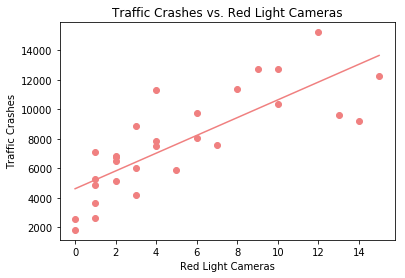

In [59]:
# Evaluate linregress results of red light cameras vs. crashes
(slope, intercept, r, p, x) = stats.linregress(merged_df['red_light_camera_count'], merged_df['crash_count'] )
line = slope * merged_df['red_light_camera_count'] + intercept

# Print regression result values
print(r, p)

# Create plot of red light cameras vs. crashes
x = merged_df['red_light_camera_count']
y = merged_df['crash_count']
plt.scatter(x,y,color='lightcoral')
plt.title("Traffic Crashes vs. Red Light Cameras")
plt.xlabel("Red Light Cameras")
plt.ylabel("Traffic Crashes")

# Create polyfit plot with best fit line
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color='lightcoral')

# Export plot of red light cameras vs. crashes as .png
plt.savefig("Crashes_vs_Red_Light_Cams.png")

0.7127924854409041 1.4335567844327788e-05


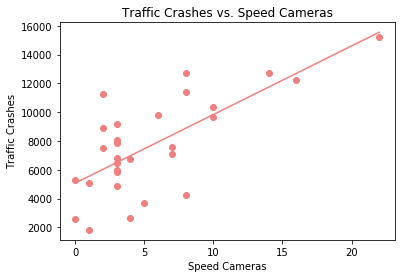

In [60]:
# Evaluate linregress results of speed cameras vs. crashes
(slope, intercept, r, p, x) = stats.linregress(merged_df['speed_camera_count'], merged_df['crash_count'] )
line = slope * merged_df['speed_camera_count'] + intercept

# Print regression result values
print(r, p)

# Create plot of speed cameras vs. crashes
x = merged_df['speed_camera_count']
y = merged_df['crash_count']
plt.scatter(x,y,color='lightcoral')
plt.title("Traffic Crashes vs. Speed Cameras")
plt.xlabel("Speed Cameras")
plt.ylabel("Traffic Crashes")

# Create polyfit plot with best fit line
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color='lightcoral')

# Export plot of red light cameras vs. crashes as .png
plt.savefig("Crashes_vs_Speed_Cams.png")

In [61]:
# Display cleaned crash DataFrame head
crashes_clean.head()

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,Lat,Lng,Region ID
0,JC193526,NaN,3/21/2019 0:50,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,2.0,0.0,0,5,3,41.808203,-87.704125,18
1,JC193531,NaN,3/21/2019 0:49,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,...,0.0,0.0,1.0,0.0,0,5,3,41.791284,-87.741697,18
2,JC193482,NaN,3/20/2019 22:35,5,TRAFFIC SIGNAL,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,RAMP,...,0.0,0.0,1.0,0.0,22,4,3,41.884390,-87.629599,13
3,JC193506,NaN,3/20/2019 22:00,30,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,4,3,41.685684,-87.603466,26
4,JC193468,NaN,3/20/2019 22:00,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,4,3,41.910866,-87.649665,8


In [62]:
# Display summary of cleaned crash DataFrame
crashes_clean.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,Lat,Lng,Region ID
count,223633.000000,1.464980e+05,223633.000000,223633.000000,223115.000000,222664.000000,222664.000000,222664.000000,222664.000000,222664.000000,222664.000000,222664.0,223633.000000,223633.000000,223633.000000,223633.000000,223633.000000,223633.000000
mean,28.250549,1.717410e+01,3581.543475,1260.202229,2.023826,0.171968,0.001010,0.019177,0.094164,0.057616,2.021360,0.0,13.130589,4.119942,6.438267,41.861999,-87.678653,13.402324
std,6.606329,3.451806e+03,2793.786054,709.756041,0.428672,0.532140,0.034872,0.161230,0.391331,0.303810,1.177955,0.0,5.475041,1.968883,3.590838,0.085139,0.057339,7.599147
min,0.000000,0.000000e+00,1.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,41.644670,-87.846102,1.000000
25%,30.000000,2.000000e+00,1200.000000,724.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,3.000000,41.790295,-87.721011,7.000000
50%,30.000000,2.000000e+00,3120.000000,1221.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.879423,-87.673647,13.000000
75%,30.000000,4.000000e+00,5500.000000,1831.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.926431,-87.633970,19.000000
max,70.000000,1.191625e+06,13799.000000,2535.000000,18.000000,21.000000,3.000000,7.000000,21.000000,10.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,-87.524587,29.000000


In [63]:
# Goup crashes by hour
crash_group = crashes_clean.groupby('CRASH_HOUR')

# Create DataFrame and store count of crashes by hour
crash_hour_df = pd.DataFrame(crash_group.count())

# Export summary of crashes by hour to .csv for use elsewhere
crash_hour_df.to_csv('Resources/Crashes_by_hour2.csv')

# Display summary DataFrame
crash_hour_df

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_DAY_OF_WEEK,CRASH_MONTH,Lat,Lng,Region ID
CRASH_HOUR,,,,,,,,,,,,,,,,,,,,,
0,4240,688,4240,4240,4240,4240,4240,4240,4240,4240,...,4200,4200,4200,4200,4200,4240,4240,4240,4240,4240
1,3650,470,3650,3650,3650,3650,3650,3650,3650,3650,...,3609,3609,3609,3609,3609,3650,3650,3650,3650,3650
2,3264,417,3264,3264,3264,3264,3264,3264,3264,3264,...,3228,3228,3228,3228,3228,3264,3264,3264,3264,3264
3,2693,356,2693,2693,2693,2693,2693,2693,2693,2693,...,2664,2664,2664,2664,2664,2693,2693,2693,2693,2693
4,2486,308,2486,2486,2486,2486,2486,2486,2486,2486,...,2462,2462,2462,2462,2462,2486,2486,2486,2486,2486
5,3192,365,3192,3192,3192,3192,3192,3192,3192,3192,...,3176,3176,3176,3176,3176,3192,3192,3192,3192,3192
6,5307,469,5307,5307,5307,5307,5307,5307,5307,5307,...,5280,5280,5280,5280,5280,5307,5307,5307,5307,5307
7,10730,657,10730,10730,10730,10730,10730,10730,10730,10730,...,10694,10694,10694,10694,10694,10730,10730,10730,10730,10730
8,13149,789,13149,13149,13149,13149,13149,13149,13149,13149,...,13108,13108,13108,13108,13108,13149,13149,13149,13149,13149


In [64]:
# Add column to DataFrame to calculate a daily average over two years (730 days)
crash_hour_df['daily_average'] = crash_hour_df['RD_NO'] / 730

# Display crash DataFrame head
crash_hour_df.head()

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_DAY_OF_WEEK,CRASH_MONTH,Lat,Lng,Region ID,daily_average
CRASH_HOUR,,,,,,,,,,,,,,,,,,,,,
0,4240,688,4240,4240,4240,4240,4240,4240,4240,4240,...,4200,4200,4200,4200,4240,4240,4240,4240,4240,5.808219
1,3650,470,3650,3650,3650,3650,3650,3650,3650,3650,...,3609,3609,3609,3609,3650,3650,3650,3650,3650,5.000000
2,3264,417,3264,3264,3264,3264,3264,3264,3264,3264,...,3228,3228,3228,3228,3264,3264,3264,3264,3264,4.471233
3,2693,356,2693,2693,2693,2693,2693,2693,2693,2693,...,2664,2664,2664,2664,2693,2693,2693,2693,2693,3.689041
4,2486,308,2486,2486,2486,2486,2486,2486,2486,2486,...,2462,2462,2462,2462,2486,2486,2486,2486,2486,3.405479


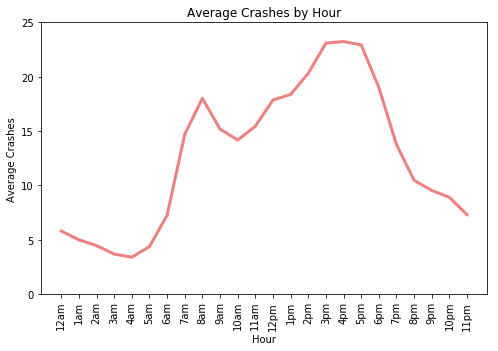

In [65]:
# Create plot of average crashes by hour
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(crash_hour_df.index.values,crash_hour_df['daily_average'],color='lightcoral',linewidth=3)

# Create title and format axes
ax.set_title("Average Crashes by Hour")
ax.set_xlabel("Hour")
ax.set_ylabel("Average Crashes")
ax.set_xticks(crash_hour_df.index.values)
ax.set_xticklabels(['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm'],ha='center')
ax.tick_params(axis='x', rotation=90)
ax.set_ylim(0,25)

# Export plot of average crashes by hour to .png
plt.savefig("Crashes_by_Hour2.png",bbox_inches='tight')